<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    IMPORTING THE REQUIRED LIBRARIES 
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import seaborn as sns

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    GETTING THE DATASET 
</p>

In [2]:
dataset = pd.read_excel("Dataset/crp.xlsx", sheet_name="Sheet1")

In [3]:
dataset

Year       City  Population (in Lakhs) (2011)+  Murder  Kidnapping  \
0    2014  Ahmedabad                           63.5    82.0       367.0   
1    2015  Ahmedabad                           63.5    94.0       332.0   
2    2016  Ahmedabad                           63.5   103.0       376.0   
3    2017  Ahmedabad                           63.5    90.0       263.0   
4    2018  Ahmedabad                           63.5    98.0       277.0   
..    ...        ...                            ...     ...         ...   
147  2017      Surat                           45.8    89.0       332.0   
148  2018      Surat                           45.8   108.0       373.0   
149  2019      Surat                           45.8    97.0       358.0   
150  2020      Surat                           45.8   116.0       163.0   
151  2021      Surat                           45.8   121.0       270.0   

     Crime against women  Crime against children  \
0                   1371                   437.0   
1                   1067                     NaN   
2                   1126                   481.0   
3                   1405                   600.0   
4                   1416                   733.0   
..                   ...                     ...   
147                  559                   526.0   
148                  712                  1075.0   
149                 1015                   770.0   
150                  633                   419.0   
151                  622                   479.0   

     Crime Committed by Juveniles  Crime against Senior Citizen  \
0                             215                          68.0   
1                             157                          17.0   
2                             258                         362.0   
3                             405                         534.0   
4                             352                         733.0   
..                            ...                           ...   
147                           436                         131.0   
148                           409                         161.0   
149                           516                         232.0   
150                           298                          69.0   
151                           355                          66.0   

     Crime against SC  Crime against ST  Economic Offences  Cyber Crimes  
0                66.0                 6              399.0          32.0  
1                60.0                 9              378.0          28.0  
2                96.0                10              479.0          77.0  
3               119.0                 6              608.0         112.0  
4               145.0                 9              842.0         212.0  
..                ...               ...                ...           ...  
147              32.0                10              719.0         105.0  
148              29.0                13              829.0         155.0  
149              34.0                19              804.0         228.0  
150              20.0                12              401.0         204.0  
151              22.0                19              663.0         296.0  

[152 rows x 13 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           152 non-null    int64  
 1   City                           152 non-null    object 
 2   Population (in Lakhs) (2011)+  152 non-null    float64
 3   Murder                         151 non-null    float64
 4   Kidnapping                     149 non-null    float64
 5   Crime against women            152 non-null    int64  
 6   Crime against children         150 non-null    float64
 7   Crime Committed by Juveniles   152 non-null    int64  
 8   Crime against Senior Citizen   149 non-null    float64
 9   Crime against SC               150 non-null    float64
 10  Crime against ST               152 non-null    int64  
 11  Economic Offences              151 non-null    float64
 12  Cyber Crimes                   151 non-null    flo

In [5]:
# MISSING VALUES
dataset.isnull().sum()


Year                             0
City                             0
Population (in Lakhs) (2011)+    0
Murder                           1
Kidnapping                       3
Crime against women              0
Crime against children           2
Crime Committed by Juveniles     0
Crime against Senior Citizen     3
Crime against SC                 2
Crime against ST                 0
Economic Offences                1
Cyber Crimes                     1
dtype: int64

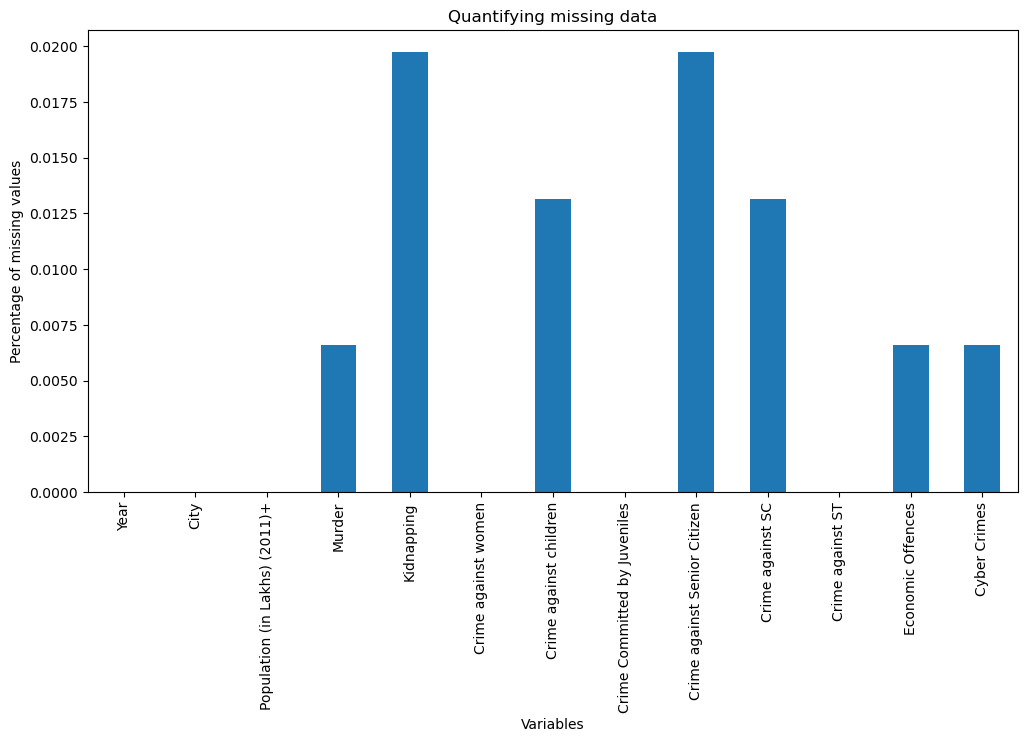

In [6]:
#lets make a bar plot with percentage of missing values per column

dataset.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

In [7]:
# handling null values filled by median
dataset.fillna(dataset.median(),inplace = True)
#dataset.fillna(dataset.mean(),inplace=True)  
dataset.isnull().sum()

C:\Users\Sankalp Kale\AppData\Local\Temp\ipykernel_19816\937463727.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.median(),inplace = True)


Year                             0
City                             0
Population (in Lakhs) (2011)+    0
Murder                           0
Kidnapping                       0
Crime against women              0
Crime against children           0
Crime Committed by Juveniles     0
Crime against Senior Citizen     0
Crime against SC                 0
Crime against ST                 0
Economic Offences                0
Cyber Crimes                     0
dtype: int64

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    DATASET INFORMATION 
</p>

*  In this study, the data has been collected from the **National Crime Records Bureau (NCRB)**, India.
*  The data provides statistics on the number of crimes commited in **19 metropolitan cities** during the year **2014 to 2021**.
*  The 19 metropolitan cities are:<br>
    `*  Ahmedabad        *  Bengaluru        *  Chennai   `<br>
    `*  Coimbatore       *  Delhi            *  Ghaziabad `<br>
    `*  Hyderabad        *  Indore           *  Jaipur    `<br>
    `*  Kanpur           *  Kochi            *  Kolkata   `<br>
    `*  Kozhikode        *  Lucknow          *  Mumbai    `<br>
    `*  Nagpur           *  Patna            *  Pune      `<br>
    `*  Surat                                             `<br>
*  It contains the records of the 10 different category of crimes commited namely:<br>
    `*  Murder                               *  Kidnapping                   `<br>
    `*  Crime against women                  *  Crime against children       `<br>
    `*  Crime Committed by Juveniles         *  Crime against Senior Citizen `<br>
    `*  Crime against SC                     *  Crime against ST             `<br>
    `*  Economic Offences                    *  Cyber Crimes                 `<br>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          margin-top:20px;
          background-color:MistyRose"> 
    DATA VISUALISATION
</p>

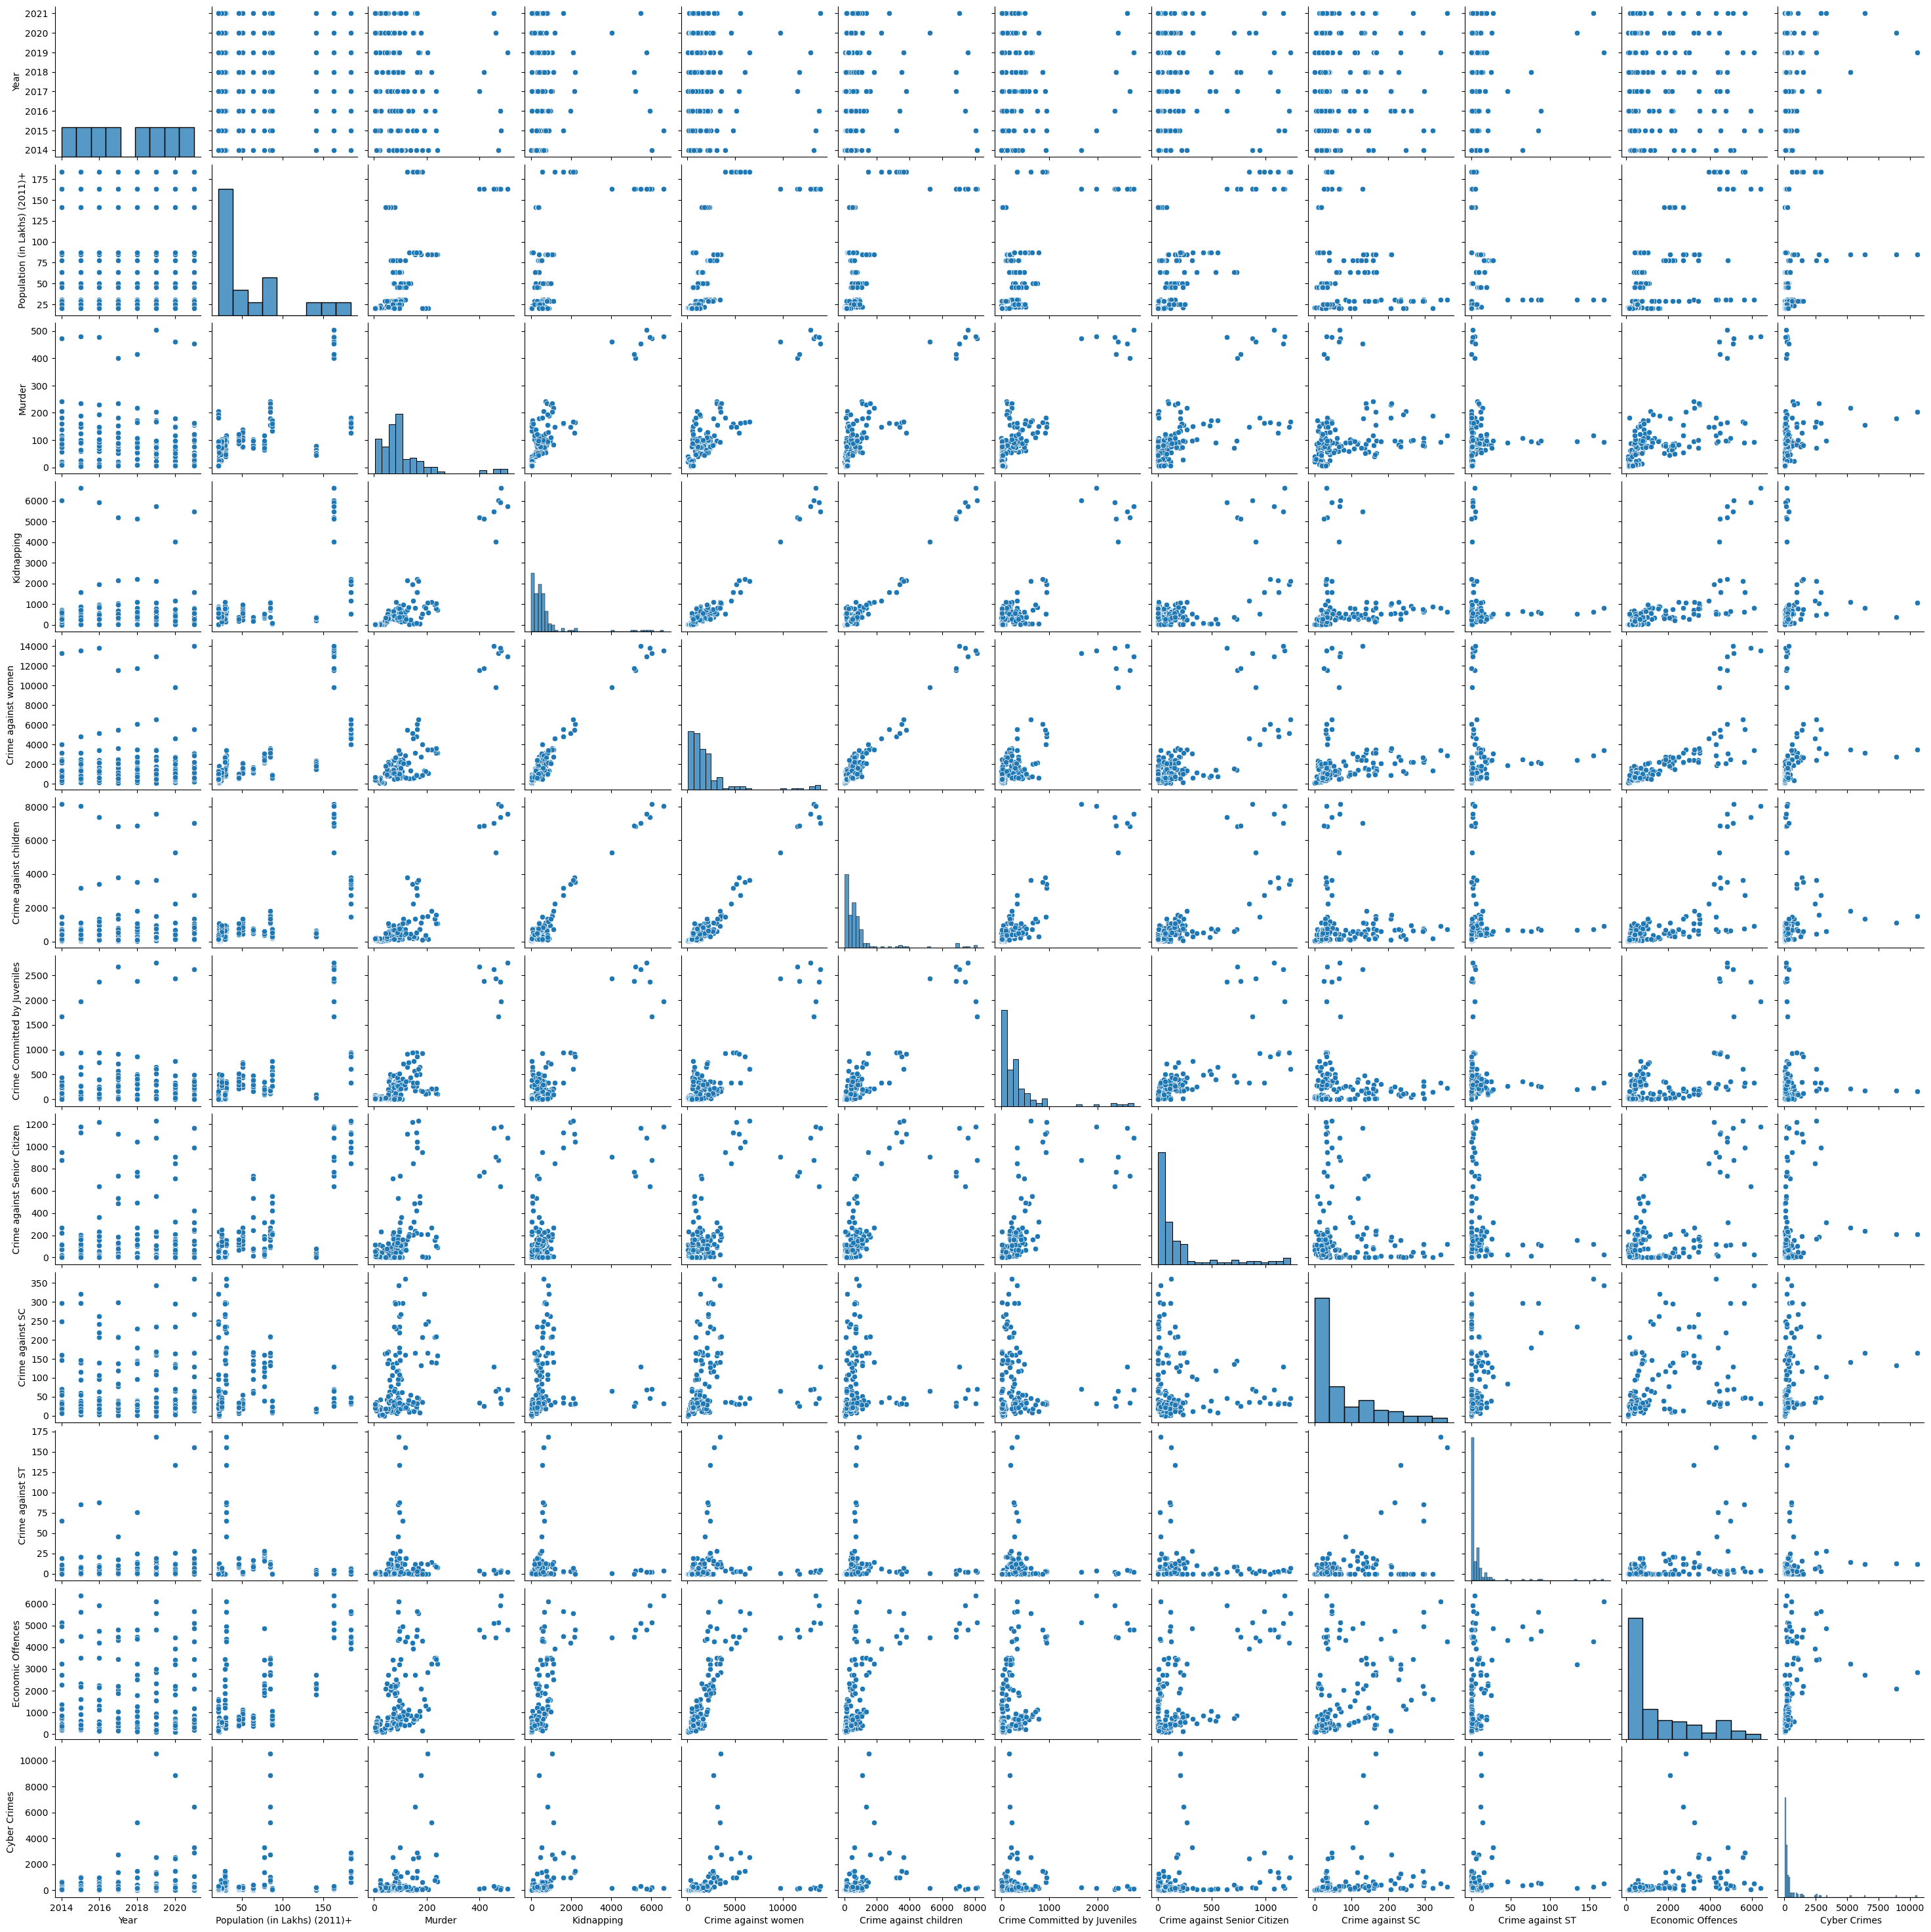

In [8]:
# PAIRPLOT 
sns.pairplot(dataset)


In [9]:
dataset.columns

Index(['Year', 'City', 'Population (in Lakhs) (2011)+', 'Murder', 'Kidnapping',
       'Crime against women', 'Crime against children',
       'Crime Committed by Juveniles', 'Crime against Senior Citizen',
       'Crime against SC', 'Crime against ST', 'Economic Offences',
       'Cyber Crimes'],
      dtype='object')

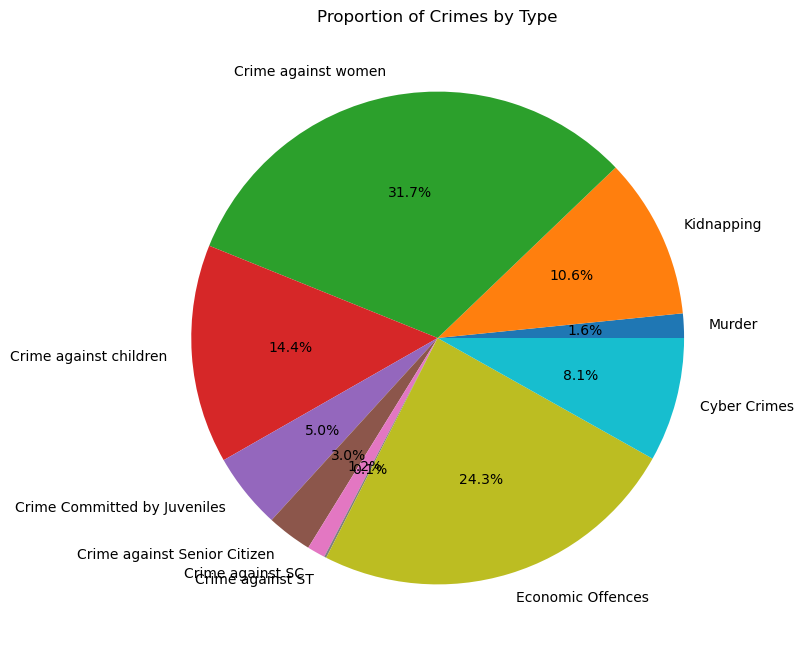

In [10]:
crime_type=dataset[['Murder', 'Kidnapping',
       'Crime against women', 'Crime against children',
       'Crime Committed by Juveniles', 'Crime against Senior Citizen',
       'Crime against SC', 'Crime against ST', 'Economic Offences',
       'Cyber Crimes' ]].sum()
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(crime_type.values, labels=crime_type.index, autopct='%1.1f%%')
plt.title('Proportion of Crimes by Type')
plt.show()

C:\Users\Sankalp Kale\AppData\Local\Temp\ipykernel_19816\3231715753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


<Axes: >

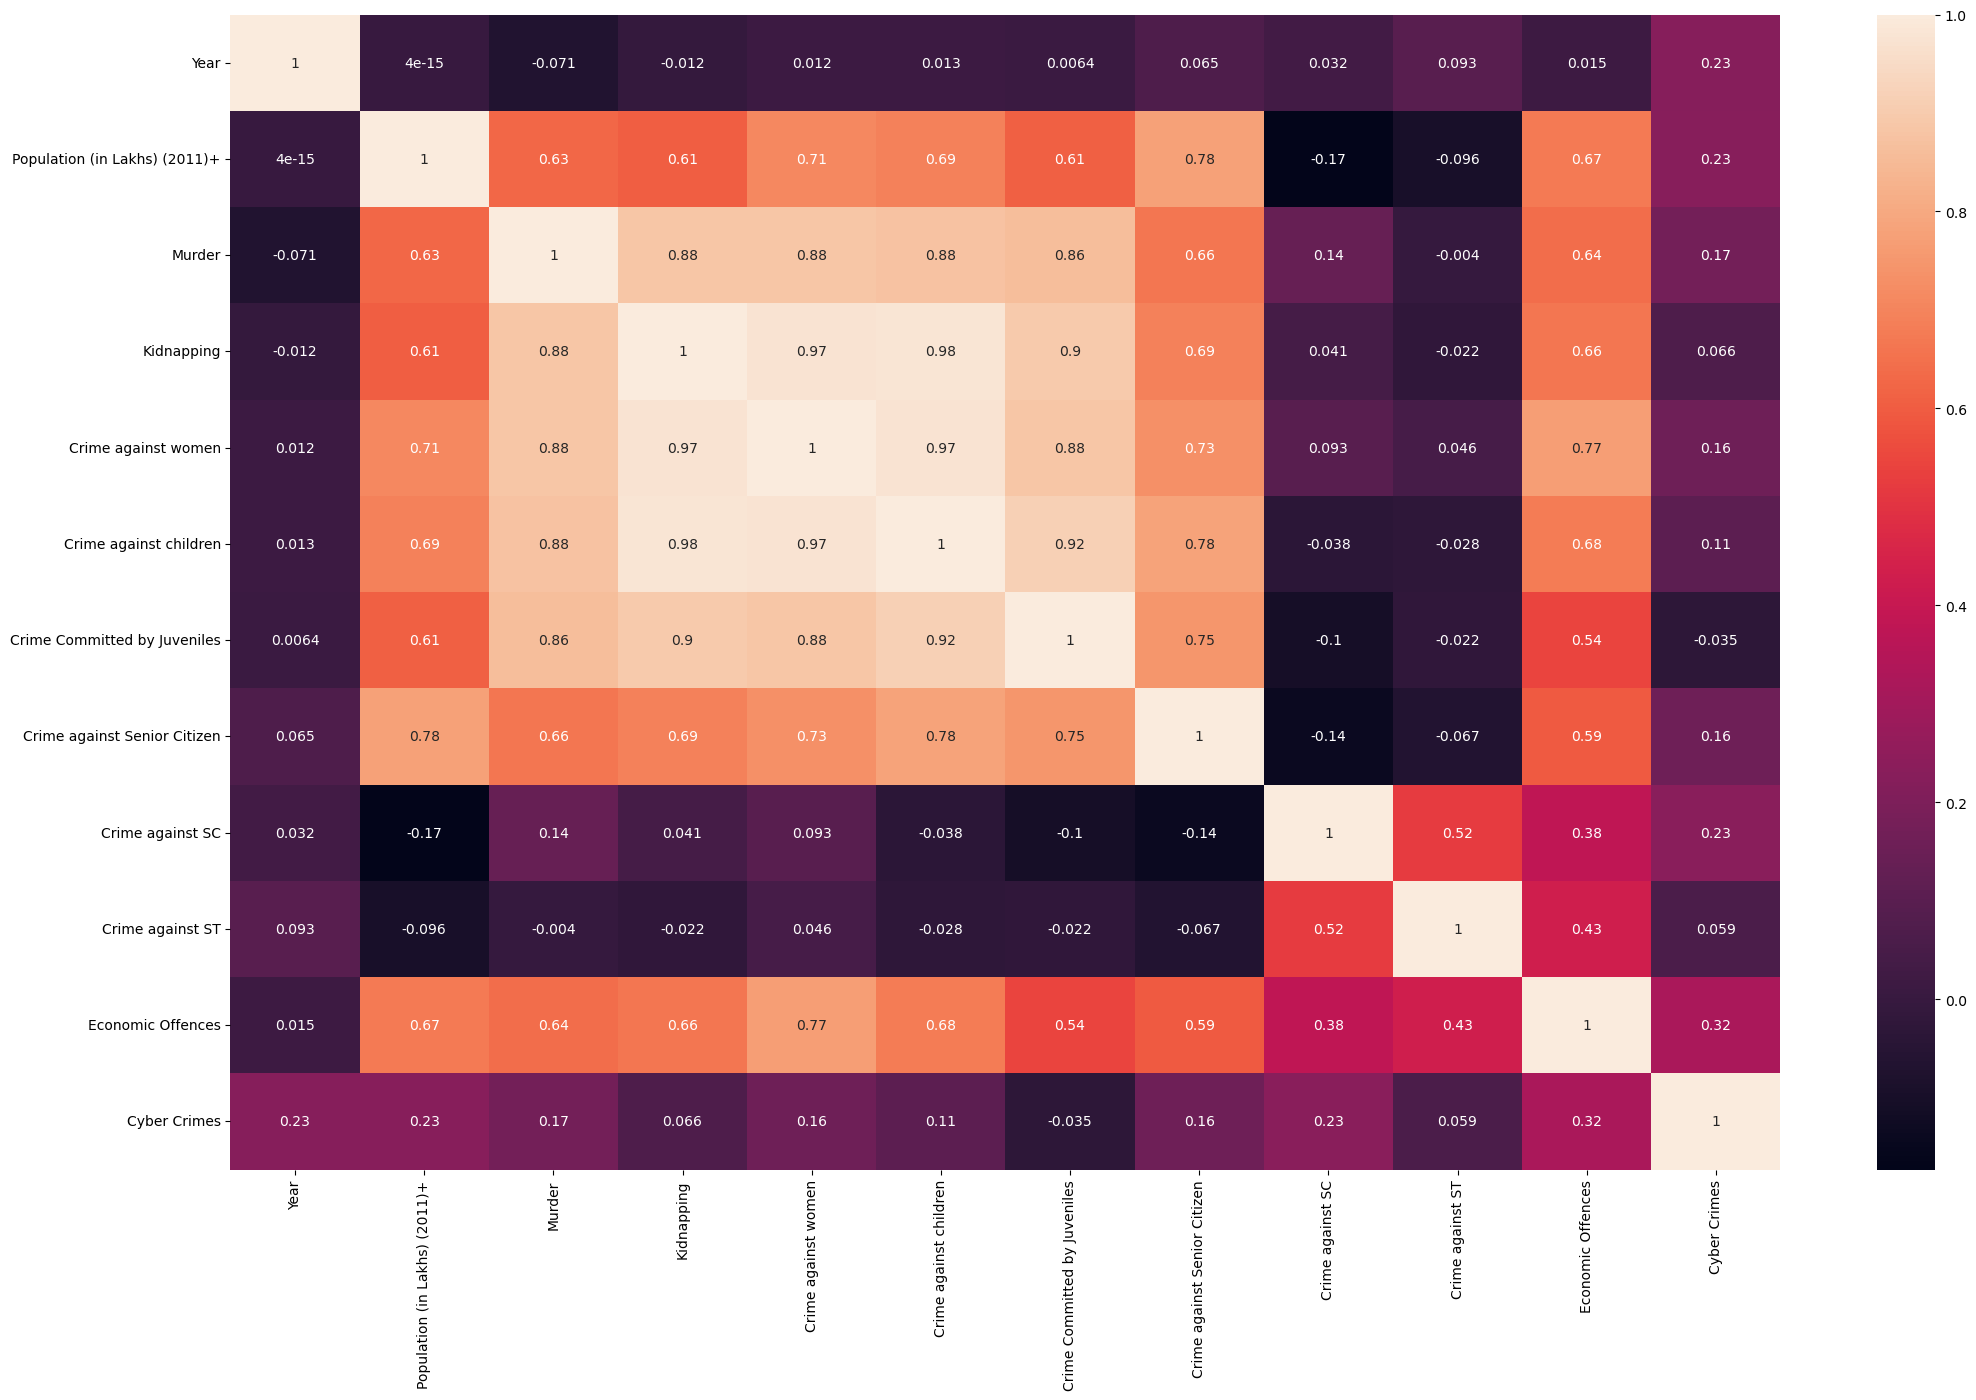

In [11]:
corr=dataset.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corr,annot=True)

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          margin-top:20px;
          background-color:MistyRose"> 
    NEW DATASET CREATION
</p>

In [12]:
new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Lakhs) (2011)+', 'Number Of Cases', 'Type'])
for i in range(3, 13):
    temp = dataset[['Year', 'City', 'Population (in Lakhs) (2011)+']].copy()
    temp['Number Of Cases'] = dataset[[dataset.columns[i]]]
    temp['Type'] = dataset.columns[i]
    
    new_df = pd.concat([new_df, temp])

In [13]:
new_df

Year       City  Population (in Lakhs) (2011)+  Number Of Cases  \
0    2014  Ahmedabad                           63.5             82.0   
1    2015  Ahmedabad                           63.5             94.0   
2    2016  Ahmedabad                           63.5            103.0   
3    2017  Ahmedabad                           63.5             90.0   
4    2018  Ahmedabad                           63.5             98.0   
..    ...        ...                            ...              ...   
147  2017      Surat                           45.8            105.0   
148  2018      Surat                           45.8            155.0   
149  2019      Surat                           45.8            228.0   
150  2020      Surat                           45.8            204.0   
151  2021      Surat                           45.8            296.0   

             Type  
0          Murder  
1          Murder  
2          Murder  
3          Murder  
4          Murder  
..            ...  
147  Cyber Crimes  
148  Cyber Crimes  
149  Cyber Crimes  
150  Cyber Crimes  
151  Cyber Crimes  

[1520 rows x 5 columns]

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          margin-top:20px;
          background-color:MistyRose"> 
    DATA PRE-PROCESSING
</p>

<p style="font: 15px Georgia; 
          color: green;
          font-style: oblique;
          text-align: justify;"> 
    The number of cases in each crime category column will be transformed into the crime rate per population(in lakhs).<br>
    Crime Rate = Total Crime Cases / Population (in Lakhs)
</p>

In [14]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population (in Lakhs) (2011)+']

In [15]:
new_df

Year       City  Population (in Lakhs) (2011)+  Number Of Cases  \
0    2014  Ahmedabad                           63.5             82.0   
1    2015  Ahmedabad                           63.5             94.0   
2    2016  Ahmedabad                           63.5            103.0   
3    2017  Ahmedabad                           63.5             90.0   
4    2018  Ahmedabad                           63.5             98.0   
..    ...        ...                            ...              ...   
147  2017      Surat                           45.8            105.0   
148  2018      Surat                           45.8            155.0   
149  2019      Surat                           45.8            228.0   
150  2020      Surat                           45.8            204.0   
151  2021      Surat                           45.8            296.0   

             Type  Crime Rate  
0          Murder    1.291339  
1          Murder    1.480315  
2          Murder    1.622047  
3          Murder    1.417323  
4          Murder    1.543307  
..            ...         ...  
147  Cyber Crimes    2.292576  
148  Cyber Crimes    3.384279  
149  Cyber Crimes    4.978166  
150  Cyber Crimes    4.454148  
151  Cyber Crimes    6.462882  

[1520 rows x 6 columns]

<p style="font: 15px Georgia; 
          color: green;
          font-style: oblique;
          text-align: justify;"> 
    As the Number Of Cases Column is obsolete, it should be dropped
</p>

In [16]:
new_df = new_df.drop(['Number Of Cases'], axis=1)

In [17]:
new_df

Year       City  Population (in Lakhs) (2011)+          Type  Crime Rate
0    2014  Ahmedabad                           63.5        Murder    1.291339
1    2015  Ahmedabad                           63.5        Murder    1.480315
2    2016  Ahmedabad                           63.5        Murder    1.622047
3    2017  Ahmedabad                           63.5        Murder    1.417323
4    2018  Ahmedabad                           63.5        Murder    1.543307
..    ...        ...                            ...           ...         ...
147  2017      Surat                           45.8  Cyber Crimes    2.292576
148  2018      Surat                           45.8  Cyber Crimes    3.384279
149  2019      Surat                           45.8  Cyber Crimes    4.978166
150  2020      Surat                           45.8  Cyber Crimes    4.454148
151  2021      Surat                           45.8  Cyber Crimes    6.462882

[1520 rows x 5 columns]

In [18]:
# saving the new dataset as an excel file
new_df.to_excel("Dataset/new_dataset.xlsx", index=False, sheet_name ='Sheet1')

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    LOADING THE NEW DATASET
</p>

In [19]:
new_dataset = pd.read_excel("Dataset/new_dataset.xlsx", sheet_name="Sheet1")

In [20]:
new_dataset

Year       City  Population (in Lakhs) (2011)+          Type  Crime Rate
0     2014  Ahmedabad                           63.5        Murder    1.291339
1     2015  Ahmedabad                           63.5        Murder    1.480315
2     2016  Ahmedabad                           63.5        Murder    1.622047
3     2017  Ahmedabad                           63.5        Murder    1.417323
4     2018  Ahmedabad                           63.5        Murder    1.543307
...    ...        ...                            ...           ...         ...
1515  2017      Surat                           45.8  Cyber Crimes    2.292576
1516  2018      Surat                           45.8  Cyber Crimes    3.384279
1517  2019      Surat                           45.8  Cyber Crimes    4.978166
1518  2020      Surat                           45.8  Cyber Crimes    4.454148
1519  2021      Surat                           45.8  Cyber Crimes    6.462882

[1520 rows x 5 columns]

In [21]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1520 non-null   int64  
 1   City                           1520 non-null   object 
 2   Population (in Lakhs) (2011)+  1520 non-null   float64
 3   Type                           1520 non-null   object 
 4   Crime Rate                     1520 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 59.5+ KB


In [22]:
new_dataset.describe()

Year  Population (in Lakhs) (2011)+   Crime Rate
count  1520.000000                    1520.000000  1520.000000
mean   2017.500000                      60.015789    11.571352
std       2.292042                      50.006465    19.526299
min    2014.000000                      20.300000     0.000000
25%    2015.750000                      21.700000     0.941537
50%    2017.500000                      30.700000     4.074018
75%    2019.250000                      85.000000    14.486662
max    2021.000000                     184.100000   198.925081

<p style="font: 15px Georgia; 
          color: green;
          font-style: oblique;
          text-align: justify;"> 
    The data is clean with no null values with column city and type as object/categorical Dtype.
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          margin-top:20px;
          background-color:MistyRose"> 
    LABEL ENCODING
</p>

<p style="font: 15px Georgia; 
          color: green;
          font-style: oblique;
          text-align: justify;"> 
    Since two columns in our dataset has categorical values i.e City and Type. <br>
    Thus, to make them machine-readable, we must convert them to numeric labels.
</p>

In [23]:
le = LabelEncoder()

In [24]:
new_dataset['City'] = le.fit_transform(new_dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [25]:
# Saving the mapping file for further use
file = open('Mappings/City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Ahmedabad - 0

Bengaluru - 1

Chennai - 2

Coimbatore - 3

Delhi - 4

Ghaziabad - 5

Hyderabad - 6

Indore - 7

Jaipur - 8

Kanpur - 9

Kochi - 10

Kolkata - 11

Kozhikode - 12

Lucknow - 13

Mumbai - 14

Nagpur - 15

Patna - 16

Pune - 17

Surat - 18



In [26]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [27]:
# Saving the mapping file for further use
file = open('Mappings/Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Crime Committed by Juveniles - 0

Crime against SC - 1

Crime against ST - 2

Crime against Senior Citizen - 3

Crime against children - 4

Crime against women - 5

Cyber Crimes - 6

Economic Offences - 7

Kidnapping - 8

Murder - 9



In [28]:
new_dataset

Year  City  Population (in Lakhs) (2011)+  Type  Crime Rate
0     2014     0                           63.5     9    1.291339
1     2015     0                           63.5     9    1.480315
2     2016     0                           63.5     9    1.622047
3     2017     0                           63.5     9    1.417323
4     2018     0                           63.5     9    1.543307
...    ...   ...                            ...   ...         ...
1515  2017    18                           45.8     6    2.292576
1516  2018    18                           45.8     6    3.384279
1517  2019    18                           45.8     6    4.978166
1518  2020    18                           45.8     6    4.454148
1519  2021    18                           45.8     6    6.462882

[1520 rows x 5 columns]

In [29]:
#outliers detction by IQR method
for col in new_dataset.columns:
    Q1=new_dataset[col].quantile(0.25)
    Q3=new_dataset[col].quantile(0.75)
    IQR=Q3-Q1
    print('IQR of %s : %d'%(col,IQR))
    lower_tail=Q1-1.5*IQR
    upper_tail=Q3+1.5*IQR
    print(f"outliers for data {lower_tail} and {upper_tail}")

IQR of Year : 3
outliers for data 2010.5 and 2024.5
IQR of City : 10
outliers for data -11.0 and 29.0
IQR of Population (in Lakhs) (2011)+ : 63
outliers for data -73.24999999999999 and 179.95
IQR of Type : 5
outliers for data -5.5 and 14.5
IQR of Crime Rate : 13
outliers for data -19.376149624334637 and 34.804348887476586


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    SPLITTING OF DATASET FOR TRAINING / TESTING
</p>

In [30]:
x = new_dataset[new_dataset.columns[0:4]].values
x

array([[2014. ,    0. ,   63.5,    9. ],
       [2015. ,    0. ,   63.5,    9. ],
       [2016. ,    0. ,   63.5,    9. ],
       ...,
       [2019. ,   18. ,   45.8,    6. ],
       [2020. ,   18. ,   45.8,    6. ],
       [2021. ,   18. ,   45.8,    6. ]])

In [31]:
y = new_dataset['Crime Rate'].values
y

array([1.29133858, 1.48031496, 1.62204724, ..., 4.97816594, 4.45414847,
       6.4628821 ])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [33]:
x_train

array([[2.018e+03, 8.000e+00, 3.070e+01, 1.000e+00],
       [2.015e+03, 1.200e+01, 2.030e+01, 3.000e+00],
       [2.014e+03, 5.000e+00, 2.360e+01, 6.000e+00],
       ...,
       [2.015e+03, 1.200e+01, 2.030e+01, 7.000e+00],
       [2.019e+03, 1.300e+01, 2.900e+01, 9.000e+00],
       [2.014e+03, 1.700e+01, 5.050e+01, 6.000e+00]])

In [34]:
y_train

array([ 5.86319218,  0.98522167,  2.58474576, ..., 12.95566502,
        2.5862069 ,  2.77227723])

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    MODEL CREATION
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:PaleTurquoise"> 
    Support Vector Machine
</p>

In [35]:
model1 = svm.SVR()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 10.314965830931316
Mean Squared Error: 371.5746433117611
R2 score: -0.17919287877389833


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:PaleTurquoise "> 
    Nearest Neighbour
</p> 

In [37]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6.857962066035716
Mean Squared Error: 150.88929334543894
R2 score: 0.5211525237289096


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:PaleTurquoise "> 
    Decision Tree Regressor
</p>

In [39]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.0385048228847165
Mean Squared Error: 37.935869738531224
R2 score: 0.8796104409949269


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:PaleTurquoise "> 
    Random Forest Regressor
</p>

In [41]:
model4 = RandomForestRegressor(random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.5036320104813443
Mean Squared Error: 22.27470133674419
R2 score: 0.9293111904542255


In [44]:
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)





In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.48924727299786
Mean Squared Error: 299.7205920954206
R2 score: 0.04883609745059925


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:LightGreen ">
    CONCLUSION:<br><br>
    The Random Forest Regression model demonstrates the best accuracy in predicting test data among the five selected models.
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    SAVING THE MODEL
</p>

In [46]:
import pickle

In [47]:
#saving the model as .pkl file
pkl_filename = "Model/model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [48]:
#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

0.9293111904542255
